In [1]:
import torch                                  # Main PyTorch Library
import torchvision                            # Tools connected to applying ML to Vision problems
import torchvision.transforms as transforms   # Tools for transforming the shape or form of data
import torchvision.datasets as datasets       # Vision (Image) Datasets
import matplotlib.pyplot as plt               # Useful if we want to plot anything
import numpy as np                            # Numerical matrix/array calculation support
import torch.nn as nn                         # Specific pytorch functionality useful for neural networks
import torch.optim as optim                   # PyTorch optimizers (let it handle the gradient updates so you don't have to)
import random                                 # Just in case we need some random numbers

In [2]:
trainset = datasets.MNIST(root='./data', train=True, download=True, transform = transforms.ToTensor())

In [ ]:
trainset.data.shape # Shows image, pixel, pixel

torch.Size([60000, 28, 28])

In [4]:
trainset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

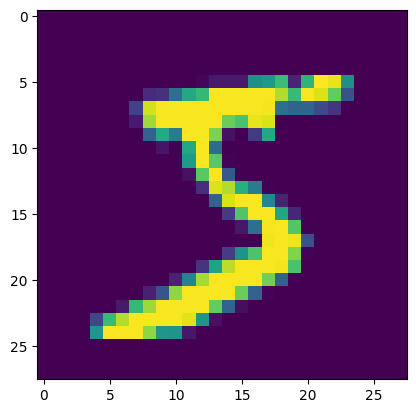

In [5]:
def imshow(img):
  img = img / 256 # Scale everything to be between 0 and 1
  plt.imshow( img ) # Generate the image
  plt.show() # Show the image

imshow( trainset.data[0] )

In [6]:
trainset.targets[0]

tensor(5)

In [7]:
x_train = (trainset.data / 256) - 0.5 # This rescales the images so that every pixel value is now between -0.5 and 0.5, which is generally just at a nicer scale than 0 to 256, numerically.
y_train = trainset.targets

In [8]:
x_train = torch.nn.Flatten()( x_train )

In [9]:
x_train.shape

torch.Size([60000, 784])

In [10]:
y_train.shape

torch.Size([60000])

In [11]:
A = torch.nn.Parameter( torch.randn(10, 784), requires_grad = True )
b = torch.nn.Parameter( torch.randn(10,1), requires_grad = True)

In [12]:
torch.matmul(A, x_train.t()).shape

torch.Size([10, 60000])

In [13]:
linear_mapping = torch.matmul(A, x_train.t()) + b

In [14]:
linear_mapping.shape

torch.Size([10, 60000])

In [15]:
linear_mapping = linear_mapping.t()

In [16]:
linear_mapping.shape

torch.Size([60000, 10])

In [17]:
linear_mapping[0]

tensor([ -6.7775,  -5.2656,  16.2161, -10.7273,  -9.2624,  15.2799,  -3.9186,
        -12.4268,  -5.2559,   6.4123], grad_fn=<SelectBackward0>)

In [18]:
logits = linear_mapping

In [19]:
probabilities = torch.nn.Softmax( dim = 1 )( logits )

In [20]:
probabilities[0]

tensor([7.4183e-11, 3.3645e-10, 7.1831e-01, 1.4288e-12, 6.1822e-12, 2.8165e-01,
        1.2940e-09, 2.6114e-13, 3.3975e-10, 3.9679e-05],
       grad_fn=<SelectBackward0>)

In [21]:
torch.sum( probabilities[ 0 ] )

tensor(1., grad_fn=<SumBackward0>)

In [23]:
y_train.shape

torch.Size([60000, 1])

In [22]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
probabilities_of_true_classes = probabilities[ np.arange(0,60000), y_train.numpy() ]

In [25]:
probabilities_of_true_classes.shape

torch.Size([60000])

In [26]:
probabilities_of_true_classes[0]

tensor(0.2817, grad_fn=<SelectBackward0>)

In [27]:
probabilities[0]

tensor([7.4183e-11, 3.3645e-10, 7.1831e-01, 1.4288e-12, 6.1822e-12, 2.8165e-01,
        1.2940e-09, 2.6114e-13, 3.3975e-10, 3.9679e-05],
       grad_fn=<SelectBackward0>)

In [47]:
alpha = 0.5

for epochs in range(10):

  linear_mapping = torch.matmul(A, x_train.t()) + b
  logits = linear_mapping.t()

  probabilities = torch.nn.Softmax( dim = 1 )( logits )

  probabilities_of_true_classes = probabilities[ np.arange(0,60000), y_train.numpy() ]

  loss = torch.mean( -1 * torch.log( probabilities_of_true_classes ) )

  print("Current Loss per Data Point:", loss.item())

  loss.backward()

  with torch.no_grad():
    A -= alpha * A.grad
    b -= alpha * b.grad

    A.grad = None
    b.grad = None

Current Loss per Data Point: 1.0162177085876465
Current Loss per Data Point: 1.0135418176651
Current Loss per Data Point: 1.0108927488327026
Current Loss per Data Point: 1.0082701444625854
Current Loss per Data Point: 1.0056735277175903
Current Loss per Data Point: 1.0031025409698486
Current Loss per Data Point: 1.0005565881729126
Current Loss per Data Point: 0.9980354309082031
Current Loss per Data Point: 0.9955386519432068
Current Loss per Data Point: 0.9930658936500549


In [48]:
identification_counts = np.zeros( shape = (10,10), dtype = np.int32 ) # Matrix of all zeros to store the counts of correct vs incorrect classifications
linear_mapping = torch.matmul(A, x_train.t()) + b
logits = linear_mapping.t()

probabilities = torch.nn.Softmax( dim = 1 )( logits )
predicted_classes = torch.argmax( probabilities, dim = 1 )

for i in range(60000):
  actual_class = y_train[i].item()
  predicted_class = predicted_classes[i].item()

  identification_counts[ actual_class, predicted_class ] += 1 # Tally that something of actual_class was most likely (by the model) to be predicted_class


print("Identification Count Matrix:\n", identification_counts)

Identification Count Matrix:
 [[5264    5   85   89   26  227  121   26   60   20]
 [   1 6196  103   80    8  124    9   33  184    4]
 [  86  141 4524  245  147   87  245  116  270   97]
 [ 103   70  290 4584   23  495   42  143  238  143]
 [  15   39  126   39 4683   94  127   96  118  505]
 [ 170   82  120  409  152 3765  147   90  376  110]
 [ 102   39  225   27  128  125 5119   11  120   22]
 [  54  117   89   96  174   35   18 5188   42  452]
 [  75  153  278  367   71  338   79   93 4236  161]
 [  51   51   73  131  461   78   34  476  141 4453]]
